In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.random.normal(100,40,100)
X1=np.random.normal(100,80,5)
theta0 = 1
theta1 = 2
y =(theta0+theta1*X)+np.random.normal(0,35,100)
m=len(X)
X_final=np.concatenate([X,X1],axis=0)
X_mat = np.matrix(X_final).T

In [19]:
X_con = np.concatenate([np.ones([m,1]),X_mat],1)

In [20]:
y_mat = np.matrix(y).T

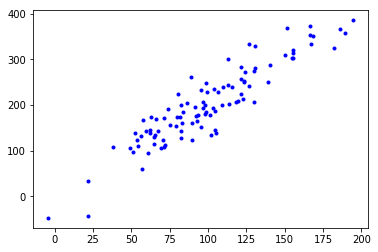

In [21]:
plt.plot(X,y,'b.')

In [22]:
theta_opt = np.linalg.inv(X_con.T*X_con)*(X_con.T*y_mat)
print(theta_opt)

[[-2.45021477]
 [ 2.04402552]]


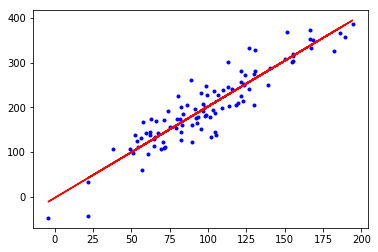

In [23]:
plt.plot(X,y,'b.')
plt.plot(X,X_con*theta_opt,'r-')

# Gradient Descend Part

In [24]:
# hypothesis function
def h(x,theta):
    return np.dot(x,theta)

# Cost function
def cost_function(X, y, theta):
    hypothesis = h(X,theta.T)
    return (1/(2*100)) * np.dot((hypothesis-y).T, (hypothesis-y))

#random theta initialized
theta1 = np.random.randn(2,1)

def gradient(X,y,theta):
    hypothesis = h(X, theta)
    return np.dot(X.T, (hypothesis - y))

In [25]:
alpha = 0.00000001
m = 500

def gradient_descent(X,y,theta,alpha):
    j_iter = np.zeros(m)
    for i in np.arange(m):
        theta = theta - alpha * gradient(X, y, theta)
        hypothesis = h(X,theta)
        j_iter[i] = cost_function(X, y, theta.T)[0][0]
    return theta, j_iter

theta_gd1, j_iter_gd1 = gradient_descent(X_con,y_mat,theta1,alpha)
y_gd1 = np.dot(X_con,theta_gd1)

In [26]:
print(theta_gd1)

[[0.50123259]
 [2.01179417]]


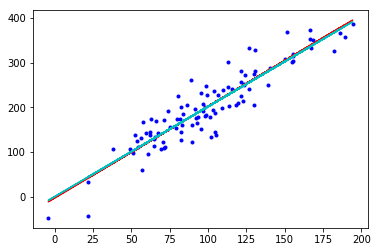

In [27]:
plt.plot(X,y,'b.')
plt.plot(X,X_con*theta_opt,'r-')
plt.plot(X,y_gd1,'c-',label='batch')